In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel
import csv
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

## load data

In [2]:
raw_impression=pd.read_pickle('../data/processed/joined_impressions.pkl')

In [3]:
df = raw_impression.dropna(subset=['contentId', 'frontPageViewId','contentPosition'], how= 'all')

In [4]:
df = df.fillna(0)

In [5]:
raw_content = pd.read_pickle('../data/processed/articles.pkl')

In [6]:
raw_content  = raw_content.rename(columns={"id": "contentId"})
raw_content 

,contentId,body,capi-id,categories,content-type,content-type-short,created,hotness,image-url,last-modified,...,paywall-state,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title
0,0Rr8A,Underholdning er ikke mangelvare i den ustabil...,234883,[fotball],news,news,2017-05-01 20:36:45,30,https://vertical.snd.no/images/8684374e-bde7-4...,2017-05-01 21:06:04,...,closed,subscription,http://www.aftenposten.no/100Sport/fotball/-Mi...,2017-05-01 21:06:04,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[mushaga bakenga, tore reginiussen, sarpsbor...",Minner mer og mer om Erik Hamréns RBK
1,0RrOJ,Hoppsjef Clas Brede Bråthen har sagt til NTB a...,234859,[vintersport],news,news,2017-05-01 11:16:31,30,https://vertical.snd.no/images/259a16bf-c2cd-4...,2017-05-01 11:18:40,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/vintersport...,2017-05-01 11:18:23,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[hopp, holmenkollen, fis]",Skiforbundet vil ikke flytte Kollensøndagen
2,0Rrg6,Etter helgens Premier League-runde er det fire...,234850,[fotball],news,news,2017-05-01 07:18:03,40,https://vertical.snd.no/images/38c6a0c9-64c3-4...,2017-05-01 08:56:02,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Den...,2017-05-01 08:30:13,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[manchester city, engelsk fotball, mancheste...",Den tette kampen mellom Guardiola og Klopp kan...
3,1aK7e,– 2016 var året USA og Storbritannia våknet op...,618629,[verden],news,news,2017-04-04 15:36:49,60,https://ap.mnocdn.no/images/8a59f5df-bd5a-43e6...,2017-05-01 21:07:21,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Trumps-seier-...,2017-05-01 18:30:00,http://www.aftenposten.no/article/ap-618629b.html,ap,bench,published,"[marine le pen, donald trump, presidentvalge...",Trumps seier har ikke løftet protestpartiene i...
4,0Rr7G,Også denne sesongen har Lionel Messi bøttet in...,234868,[fotball],news,news,2017-05-01 15:16:34,40,https://vertical.snd.no/images/ba027d24-cee0-4...,2017-05-01 17:26:51,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/fotball/Bil...,2017-05-01 17:22:22,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,"[lionel messi, teheran, barcelona, argentin...",Bildene av Messis dobbeltgjenger går verden ru...
5,1lr9e,"Hamas-leder Khaled Meshaal, som bor i eksil i ...",620268,[verden],news,news,2017-05-01 18:38:32,30,https://ap.mnocdn.no/images/afb62071-4c86-4a1c...,2017-05-01 18:42:25,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Hamas-vil-ikk...,2017-05-01 18:38:32,http://www.aftenposten.no/article/ap-620268b.html,ap,bench,published,[],Hamas vil ikke lenger kreve at Israel skal uts...
6,26oea,Alexander Kristoff (29) klinket till og vant E...,234874,[sykkel],news,news,2017-05-01 16:48:59,40,https://vertical.snd.no/images/8de5f80c-a94b-4...,2017-05-01 17:17:15,...,closed,"metered,subscription",http://www.aftenposten.no/100Sport/sykkel/Kris...,2017-05-01 17:09:32,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,[alexander kristoff],Kristoff hylles av TV 2-profil - grep mikrofon...
7,0RWrJ,Siv Jensen tar imot Aftenposten på møterommet ...,620160,"[norge, politikk]",news,news,2017-04-28 16:46:11,60,https://ap.mnocdn.no/images/edda47a8-6b1d-45c2...,2017-05-01 18:45:07,...,closed,"metered,subscription",http://www.aftenposten.no/norge/politikk/---De...,2017-05-01 18:30:00,http://www.aftenposten.no/article/ap-620160b.html,ap,bench,published,"[siv jensen, stortingsvalg 2017, fremskritts...",- Det er ganske kjedelig i lengden når hvert ...
8,26oqB,Meldingen om brannen i Imam Ali Islamic Center...,620235,[verden],news,news,2017-04-30 23:21:28,40,https://ap.mnocdn.no/images/12ba883b-49f3-4249...,2017-05-01 10:42:57,...,closed,"metered,subscription",http://www.aftenposten.no/verden/Politiet-mist...,2017-

### add feature time

In [7]:
raw_content.keys()

Index(['contentId', 'body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title'],
      dtype='object')

In [8]:
raw_content['publishTime'] = raw_content.published.apply(lambda x: x.hour) 

In [9]:
df['impressionTime'] = df.impressionTimestamp.apply(lambda x: x.hour) 

In [10]:
merged_df = df.merge(raw_content,on='contentId',how='left')
merged_df

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,variantId,clickTimestamp,isClicked,maxSecondsSincePageView,maxDuration,...,paywall-type,presentation-url,published,share-url,source-publication,source-system,status,tags,title,publishTime
0,sdrn:schibsted:environment:ec532771-c6a3-466e-...,15bc1b97-b806-4ae8-bca8-a5d7f5b0229f,15,2017-06-12 23:59:59,4p569,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,"metered,subscription",http://www.aftenposten.no/reise/Tar-du-ut-valu...,2017-06-12 09:00:00,http://www.aftenposten.no/article/riks-10247b....,riks,bench,published,"[forbrukerspørsmål, reise, valuta, forbruke...",Tar du ut valuta før du reiser? Ikke gjør det.,9.0
1,sdrn:schibsted:environment:d70b0638-a8b4-48e8-...,002e033f-cfe1-47d8-bbf7-739582cfb937,4,2017-06-13 00:00:01,QeeO4,apRegularFrontpage,2017-06-13 00:00:13,1.0,120.0,67000.0,...,subscription,http://www.aftenposten.no/amagasinet/Belt-12-f...,2017-06-08 16:04:56,http://www.aftenposten.no/article/ap-622098b.html,ap,bench,published,"[krisesenter, drap, vold, barnevern]",Belt (12) feiret bursdag for første gang i Nor...,16.0
2,sdrn:schibsted:environment:ec532771-c6a3-466e-...,15bc1b97-b806-4ae8-bca8-a5d7f5b0229f,16,2017-06-13 00:00:03,MyGjr,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,subscription,http://www.aftenposten.no/amagasinet/-Kan-kuns...,2017-06-08 19:30:00,http://www.aftenposten.no/article/ap-621666b.html,ap,bench,published,"[klima, kunst, forskning og vitenskap, ntnu...",Kan kunst få deg til å forstå forskning bedre?,19.0
3,sdrn:schibsted:environment:ec532771-c6a3-466e-...,15bc1b97-b806-4ae8-bca8-a5d7f5b0229f,18,2017-06-13 00:00:11,dV58X,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,"metered,subscription",http://www.aftenposten.no/verden/Putins-storst...,2017-06-12 10:45:19,http://www.aftenposten.no/article/ap-622982b.html,ap,bench,published,"[russland, korrupsjon, moskva, vladimir putin]",Putins største fiende arrestert. Minst 900 er ...,10.0
4,sdrn:schibsted:environment:d114c8fa-1035-487d-...,d6b00bfc-be92-4871-835f-5e4bef1da196,1,2017-06-13 00:00:17,84zpQ,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sdrn:schibsted:environment:ec532771-c6a3-466e-...,15bc1b97-b806-4ae8-bca8-a5d7f5b0229f,19,2017-06-13 00:00:19,99l4W,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,"metered,subscription",http://www.aftenposten.no/100Sport/andreidrett...,2017-06-12 12:26:54,http://www.aftenposten.no/100Sport/article/spo...,sport,bench,published,[øygarden],Motorer er blitt kastet på sjøen. Bensintanker...,12.0
6,sdrn:schibsted:environment:ec532771-c6a3-466e-...,15bc1b97-b806-4ae8-bca8-a5d7f5b0229f,20,2017-06-13 00:00:25,nqg9Q,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,"metered,subscription",http://www.aftenposten.no/norge/Irans-utenriks...,2017-06-12 21:12:07,http://www.aftenposten.no/article/ap-623043b.html,ap,bench,published,[iran],Irans utenriksminister i kort møte med norsk p...,21.0
7,sdrn:schibsted:environment:ec532771-c6a3-466e-...,15bc1b97-b806-4ae8-bca8-a5d7f5b0229f,21,2017-06-13 00:00:31,EVob5,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,"metered,subscription",http://www.aftenposten.no/verden/Politisk-dram...,2017-06-12 20:01:10,http://www.aftenposten.no/article/ap-623045b.html,ap,bench,published,"[finland, høyrepopulisme, juha sipilä]",Politisk drama i Finland: Statsministeren ber ...,20.0
8,sdrn:schibsted:environment:e12adcb2-8030-495d-...,83d57b39-0313-4d46-8b54-656b96f8ed3a,1,2017-06-13 00:00:33,78EJ4,apRegularFrontpage,1970-01-01 00:00:00,0.0,0.0,0.0,...,subscription,http://www.aftenposten.no/norge/Skal-slepe-fly...,2017-06-12 19:21:35,http://www.aftenposten.no/article/ap-622730b.html,ap,bench,published,"[vågsøy, kystverket, beredskap, russland, ...",Skal slepe flytende russisk atomkraftverk lang...,19.0
9,sdrn:schibsted:environment:e12adcb2-8030-495d-...,83d57b39-0313-4d46-8b54-656b96f8ed3a,2,2017-06-13 00:00:33,knqma,apRegularFrontpage,19

In [11]:
merged_df.keys()

Index(['environmentId', 'frontPageViewId', 'contentPosition',
       'impressionTimestamp', 'contentId', 'variantId', 'clickTimestamp',
       'isClicked', 'maxSecondsSincePageView', 'maxDuration',
       'maxScrollPosition', 'contentWordCount', 'impressionTime', 'body',
       'capi-id', 'categories', 'content-type', 'content-type-short',
       'created', 'hotness', 'image-url', 'last-modified', 'lead', 'lifetime',
       'normalized-hotness', 'normalized-lifetime', 'paywall-state',
       'paywall-type', 'presentation-url', 'published', 'share-url',
       'source-publication', 'source-system', 'status', 'tags', 'title',
       'publishTime'],
      dtype='object')

# basic click models 
### 1. Random clicked models

In [22]:
df.isClicked.sum()/len(df)

0.02451857321815399

### 2. Rank based CTR model

In [23]:
rctrdf = df.groupby('contentPosition').aggregate({'isClicked': sum, 'frontPageViewId': len})
rctrdf['probability'] = rctrdf.isClicked.fillna(0)/rctrdf.frontPageViewId
rctrdf

,isClicked,frontPageViewId,probability
contentPosition,,,
1,4696.0,108390,0.043325
2,3746.0,85829,0.043645
3,3338.0,83566,0.039944
4,2979.0,78899,0.037757
5,2354.0,70291,0.033489
6,2215.0,67266,0.032929
7,1820.0,60681,0.029993
8,1595.0,58451,0.027288
9,1366.0,52268,0.026135


### 3. Position-based model

In [24]:
pbmdf = pd.DataFrame((df.groupby('contentPosition').aggregate({'frontPageViewId': len})).frontPageViewId)/(df.frontPageViewId.nunique())
pbmdf = pbmdf.rename(columns={'frontPageViewId':'PEr'})
pbmdf2 = df.groupby('contentId').aggregate({'isClicked':sum , 'frontPageViewId':len})
pbmdf2['PAu'] = pbmdf2.isClicked.fillna(0)/pbmdf2.frontPageViewId
pbmdf2 = pd.DataFrame(pbmdf2.PAu)
pbmdf3 = df.groupby(['contentId','contentPosition']).aggregate({'isClicked':sum})
pbmdfall = pbmdf3.join(pbmdf, how='outer')
pbmdfall = pbmdfall.join(pbmdf2,how='outer')
pbmdfall['PCu'] = pbmdfall.PEr*pbmdfall.PAu
pbmdfall

isClicked       PEr       PAu       PCu
contentId contentPosition                                         
014kG     1                     22.0  0.828378  0.023134  0.019164
          2                      1.0  0.655954  0.023134  0.015175
          3                      3.0  0.638659  0.023134  0.014775
          4                      2.0  0.602991  0.023134  0.013950
          5                      8.0  0.537204  0.023134  0.012428
          6                      1.0  0.514085  0.023134  0.011893
          7                      3.0  0.463759  0.023134  0.010729
          8                      2.0  0.446716  0.023134  0.010334
          9                      4.0  0.399462  0.023134  0.009241
          10                     2.0  0.387937  0.023134  0.008975
          11                     0.0  0.360171  0.023134  0.008332
          12                     0.0  0.342303  0.023134  0.007919
          13                     0.0  0.322272  0.023134  0.007456
          14                     2.0  0.306429  0.023134  0.007089
          15                     2.0  0.285702  0.023134  0.006610
          16                     0.0  0.258059  0.023134  0.005970
          17                     4.0  0.253046  0.023134  0.005854
          18                     1.0  0.241536  0.023134  0.005588
          19                     0.0  0.227076  0.023134  0.005253
          20                     3.0  0.215169  0.023134  0.004978
          21                     2.0  0.203705  0.023134  0.004713
          22                     1.0  0.192241  0.023134  0.004447
          23                     0.0  0.174572  0.023134  0.004039
          24                     1.0  0.168817  0.023134  0.003905
          25                     2.0  0.160387  0.023134  0.003710
          26                     3.0  0.151934  0.023134  0.003515
          27                     0.0  0.144674  0.023134  0.003347
          28                     0.0  0.138277  0.023134  0.003199
          29                     3.0  0.131276  0.023134  0.003037
          30                     1.0  0.124635  0.023134  0.002883
...                              ...       ...       ...       ...
zqr84     39                     0.0  0.078077  0.007776  0.000607
          40                     0.0  0.074400  0.007776  0.000579
          41                     0.0  0.072413  0.007776  0.000563
          42                     0.0  0.067041  0.007776  0.000521
          43                     0.0  0.064954  0.007776  0.000505
          44                     0.0  0.063472  0.007776  0.000494
          45                     1.0  0.060865  0.007776  0.000473
          46                     0.0  0.058519  0.007776  0.000455
          47                     0.0  0.057166  0.007776  0.000445
          48                     0.0  0.053315  0.007776  0.000415
          49                     0.0  0.051580  0.007776  0.000401
          50                     0.0  0.050189  0.007776  0.000390
          51                     0.0  0.048813  0.007776  0.000380
          52                     0.0  0.047231  0.007776  0.000367
          53                     0.0  0.045259  0.007776  0.000352
          54                     0.0  0.042493  0.007776  0.000330
          55                     0.0  0.041782  0.007776  0.000325
          56                     0.0  0.040643  0.007776  0.000316
          58                     1.0  0.037762  0.007776  0.000294
          60                     0.0  0.034430  0.007776  0.000268
          61                     0.0  0.033352  0.007776  0.000259
zqrQr     1                     44.0  0.828378  0.038690  0.032050
          2                     57.0  0.655954  0.038690  0.025379
          3                     14.0  0.638659  0.038690  0.024710
          10                     0.0  0.387937  0.038690  0.015009
          12                     0.0  0.342303  0.038690  0.013244
          16                     0.0  0.258059  0.038690  0.009984
       

In [111]:
pbmdfall.to_csv('../data/output/PBM_prediction_results.csv', sep=',')

### 4. COEC model

In [25]:
coecdf = df.groupby(['environmentId','contentId','contentPosition']).aggregate({'frontPageViewId':len,'isClicked':len})
coecdf = coecdf.rename(columns={'isClicked':'examination', 'frontPageViewId':'impressions'})
coecdf['Beta']=coecdf['examination'].fillna(0)/coecdf['impressions']
coecdf2 = df.groupby('contentId').aggregate({'isClicked':sum})
coecdf = coecdf.reset_index()
coecdf1 = coecdf.groupby(['contentId']).aggregate({'Beta':sum})
coecdf3 = coecdf2.join(coecdf1, how='outer')
coecdf3['Alpha'] = coecdf3.isClicked.fillna(0)/coecdf3.Beta

In [26]:
coecdf3

,isClicked,Beta,Alpha
contentId,,,
014kG,93.0,3698.0,0.025149
014mo,2.0,349.0,0.005731
01E30,18.0,829.0,0.021713
01EAg,31.0,2021.0,0.015339
01EVA,10.0,736.0,0.013587
01Eyg,18.0,480.0,0.037500
01Gko,31.0,2930.0,0.010580
01Gq2,12.0,180.0,0.066667
01K4E,0.0,78.0,0.000000


In [110]:
coecdf3.to_csv('../data/output/COEC_prediction_results.csv', sep=',')

### 5. Logistic Regression model

In [12]:
raw_content.keys()

Index(['contentId', 'body', 'capi-id', 'categories', 'content-type',
       'content-type-short', 'created', 'hotness', 'image-url',
       'last-modified', 'lead', 'lifetime', 'normalized-hotness',
       'normalized-lifetime', 'paywall-state', 'paywall-type',
       'presentation-url', 'published', 'share-url', 'source-publication',
       'source-system', 'status', 'tags', 'title', 'publishTime'],
      dtype='object')

In [13]:
from sklearn import preprocessing
from itertools import chain

def columns_to_key_feature_pairs(row, key_column, feature_columns):
    return [(row[key_column], '{}={}'.format(column, row[column])) for column in feature_columns]

def array_column_to_key_feature_pairs(row, key_column, array_column):
    return [(row[key_column], u'{}={}'.format(array_column, value)) for value in row[array_column]]

feature_columns = ['contentId', 'hotness', 'lifetime', 'publishTime']

item_features = pd.DataFrame.from_records(
    data=chain.from_iterable(
        columns_to_key_feature_pairs(row, key_column='contentId', feature_columns=feature_columns) +\
        array_column_to_key_feature_pairs(row, key_column='contentId', array_column='categories') +\
        array_column_to_key_feature_pairs(row, key_column='contentId', array_column='tags')
        for _, row in raw_content.iterrows()), 
    columns=['item', 'feature_name'],
    index='item')

item_features.head()

,feature_name
item,
0Rr8A,contentId=0Rr8A
0Rr8A,hotness=30
0Rr8A,lifetime=20
0Rr8A,publishTime=21
0Rr8A,categories=fotball


In [14]:
max_position = df.contentPosition.max()
content_positions = np.arange(max_position)

context_features = pd.DataFrame.from_dict(
    {'contentPosition': content_positions, 'feature_name': ['position={}'.format(p) for p in content_positions]}
).set_index('contentPosition')

context_features.head()

,feature_name
contentPosition,
0,position=0
1,position=1
2,position=2
3,position=3
4,position=4


In [15]:
all_features = pd.concat([item_features, context_features],axis=0)

all_features.feature_name = all_features.feature_name.astype('category')
all_features['encoded_feature'] = all_features.feature_name.cat.codes

all_features.head()

,feature_name,encoded_feature
0Rr8A,contentId=0Rr8A,196
0Rr8A,hotness=30,6262
0Rr8A,lifetime=20,6269
0Rr8A,publishTime=21,6347
0Rr8A,categories=fotball,17


In [16]:
all_features.tail()

,feature_name,encoded_feature
56,position=56,6324
57,position=57,6325
58,position=58,6326
59,position=59,6327
60,position=60,6329


In [17]:
batch_impressions = df[['contentPosition', 'contentId', 'isClicked', 'impressionTime']]\
    .assign(sample_id=lambda df: np.arange(df.shape[0]))\
    .set_index('sample_id')

rich_impressions = pd.concat([
    #pd.merge(batch_impressions, all_features, left_on='environmentId', right_index=True),
    pd.merge(batch_impressions, all_features, left_on='contentId', right_index=True),
    pd.merge(batch_impressions, all_features, left_on='contentPosition', right_index=True)],
    axis=0).sort_index()

rich_impressions.head()

,contentPosition,contentId,isClicked,impressionTime,feature_name,encoded_feature
sample_id,,,,,,
0,15,4p569,0.0,23,contentId=4p569,657
0,15,4p569,0.0,23,tags= forbrukerrådet,6983
0,15,4p569,0.0,23,tags= valuta,8519
0,15,4p569,0.0,23,tags= reise,8007
0,15,4p569,0.0,23,tags=forbrukerspørsmål,8965


In [43]:
# test = (rich_impressions.index.unique())

In [18]:
from sklearn.preprocessing import LabelEncoder  
from scipy import sparse

def feature_matrix(rich_impressions, all_features=all_features):
    
    row_indexes = rich_impressions.index.values    
    column_indexes = rich_impressions.encoded_feature.values
    n_max_encoded_feature = all_features.feature_name.cat.codes.max()
    
    output = sparse.coo_matrix(
        (np.ones_like(column_indexes), 
        (row_indexes, column_indexes)),
        shape=(row_indexes.max() + 1, n_max_encoded_feature+1))
    
    return output

In [19]:
X_feature = feature_matrix(rich_impressions)
X_feature

<1547847x9899 sparse matrix of type '<class 'numpy.int16'>'
	with 15074126 stored elements in COOrdinate format>

In [20]:
category_feature_indexes = all_features[all_features.feature_name.str.startswith('cat')].encoded_feature

X_category = feature_matrix(rich_impressions[rich_impressions.encoded_feature.isin(category_feature_indexes)])
X_category

<1547847x9899 sparse matrix of type '<class 'numpy.int16'>'
	with 1818454 stored elements in COOrdinate format>

In [21]:
Y = df.isClicked

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X_feature, Y, test_size=0.33, random_state=42)

#### LR prediction

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

predicted_probas = lr.predict_proba(X_test)

In [38]:
X_test

<510790x9899 sparse matrix of type '<class 'numpy.int16'>'
	with 4731316 stored elements in Compressed Sparse Row format>

In [33]:
len(predicted_probas)

510790

#### save logistic regression results

In [106]:
np.savetxt('../data/output/logistic_regression_prediction_results.txt', predicted_probas)

In [109]:
lr_results = np.loadtxt('../data/output/logistic_regression_prediction_results.txt')
lr_results

array([[ 0.9416135 ,  0.0583865 ],
       [ 0.98501435,  0.01498565],
       [ 0.98540196,  0.01459804],
       ..., 
       [ 0.9926815 ,  0.0073185 ],
       [ 0.98232829,  0.01767171],
       [ 0.96955902,  0.03044098]])

# Evaluation
# 1. Random clicked models
### Use Mean-Square-Error method

In [27]:
rcm_mse = df[['contentId', 'contentPosition', 'isClicked']]
rcm_mse['predicted'] = 0.02441861737002657
rcm_mse['evaluation'] = rcm_mse.isClicked-rcm_mse.predicted
rcm_mse['square'] = rcm_mse.evaluation**2
rcm_mse_result = rcm_mse.square.sum()/len(rcm_mse)
rcm_mse_result

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

0.023917422776356438

### evaluation use log loss

In [28]:
rcm_lls = df[['contentId', 'contentPosition', 'isClicked']]
rcm_lls['predicted'] = 0.02441861737002657
rcm_lls['predicted_non'] = 1-0.02441861737002657

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
rcm_lls

,contentId,contentPosition,isClicked,predicted,predicted_non
0,4p569,15,0.0,0.024419,0.975581
1,QeeO4,4,1.0,0.024419,0.975581
2,MyGjr,16,0.0,0.024419,0.975581
4,dV58X,18,0.0,0.024419,0.975581
6,84zpQ,1,0.0,0.024419,0.975581
7,99l4W,19,0.0,0.024419,0.975581
8,nqg9Q,20,0.0,0.024419,0.975581
9,EVob5,21,0.0,0.024419,0.975581
10,78EJ4,1,0.0,0.024419,0.975581
11,knqma,2,0.0,0.024419,0.975581


In [30]:
y_true_rcm=rcm_lls.isClicked.tolist()
rcm = list(zip(rcm_lls.predicted, rcm_lls.predicted_non))
y_pred_rcm = [list(i) for i in rcm]
rcm_lls_result = sklearn.metrics.log_loss(y_true_rcm, y_pred_rcm)
rcm_lls_result

3.6219925889241749

### evaluation use AUC

In [31]:
rcm_auc = df[['contentId', 'contentPosition', 'isClicked']]
rcm_auc['predicted'] = 0.02441861737002657

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
rcm_auc

,contentId,contentPosition,isClicked,predicted
0,4p569,15,0.0,0.024419
1,QeeO4,4,1.0,0.024419
2,MyGjr,16,0.0,0.024419
4,dV58X,18,0.0,0.024419
6,84zpQ,1,0.0,0.024419
7,99l4W,19,0.0,0.024419
8,nqg9Q,20,0.0,0.024419
9,EVob5,21,0.0,0.024419
10,78EJ4,1,0.0,0.024419
11,knqma,2,0.0,0.024419


In [33]:
metrics.roc_auc_score(y_true=rcm_auc.isClicked, y_score=rcm_auc.predicted)

0.5

In [34]:
fpr_rcm, tpr_rcm, thresholds_rcm = roc_curve(
    y_true=rcm_auc.isClicked,
    y_score=rcm_auc.predicted)

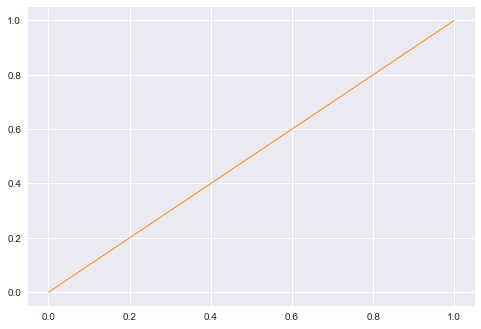

In [36]:
plt.plot(fpr_rcm, tpr_rcm, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr_rcm, tpr_rcm))

plt.show()

# 2. Rank based CTR model
### Use Mean-Square-Error method

In [37]:
rctr_mse = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentPosition']).join(rctrdf.probability)
rctr_mse['evaluation'] = rctr_mse.isClicked-rctr_mse.probability
rctr_mse['square'] = rctr_mse.evaluation**2
rctr_mse_result = rctr_mse.square.sum()/len(rctr_mse)
rctr_mse_result

0.023789425275192785

### evaluation use log loss

In [38]:
rctr_lls = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentPosition']).join(rctrdf.probability)
rctr_lls['predicted_non'] = 1-rctr_lls.probability
rctr_lls

,contentId,isClicked,probability,predicted_non
contentPosition,,,,
1,84zpQ,0.0,0.043325,0.956675
1,78EJ4,0.0,0.043325,0.956675
1,2W1Vl,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,78EJ4,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,2W1Vl,0.0,0.043325,0.956675


In [39]:
y_true_rctr = rctr_lls.isClicked.tolist()
rctr = list(zip(rctr_lls.probability, rctr_lls.predicted_non))
y_pred_rctr = [list(i) for i in rctr]
rctr_lls_result = sklearn.metrics.log_loss(y_true_rctr, y_pred_rctr)
rctr_lls_result

3.7307755815343278

### evaluation use AUC

In [40]:
rctr_auc = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentPosition']).join(rctrdf.probability)
metrics.roc_auc_score(y_true=rctr_auc.isClicked, y_score=rctr_auc.probability)

0.63332649184376943

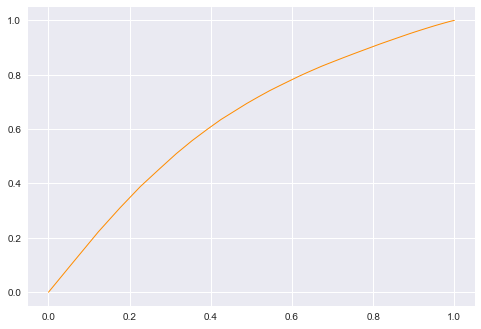

In [42]:
fpr_rctr, tpr_rctr, thresholds_rctr = roc_curve(
    y_true=rctr_auc.isClicked,
    y_score=rctr_auc.probability)
plt.plot(fpr_rctr, tpr_rctr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr_rctr, tpr_rctr))

plt.show()

#  3. Position-based model

In [43]:
pbm_eva_df = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentId','contentPosition']).join(pbmdfall.PCu)
pbm_eva_df['evaluation'] = pbm_eva_df.isClicked - pbm_eva_df.PCu
pbm_eva_df['square'] = pbm_eva_df.evaluation**2
pbm_eva_df['predicted_non'] = 1 - pbm_eva_df.PCu

In [44]:
pbm_eva_df

isClicked       PCu  evaluation    square  \
contentId contentPosition                                              
014kG     1                      1.0  0.019164    0.980836  0.962039   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      1.0  0.019164    0.980836  0.962039   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
          1                      0.0  0.019164   -0.019164  0.000367   
...                              ...       ...         ...       ...   
zqrQr     18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.00008

### Use Mean-Square-Error method

In [45]:
pbm_mse_result = pbm_eva_df.square.sum()/len(pbm_eva_df)
pbm_mse_result

0.023871586623877623

### evaluation use log loss

In [46]:
y_true_pbm = pbm_eva_df.isClicked.tolist()
pbm = list(zip(pbm_eva_df.PCu, pbm_eva_df.predicted_non))
y_pred_pbm = [list(i) for i in pbm]
pbm_lls_result = sklearn.metrics.log_loss(y_true_pbm, y_pred_pbm)
pbm_lls_result

5.3153574606613372

### evaluation use AUC

In [47]:
metrics.roc_auc_score(y_true=pbm_eva_df.isClicked, y_score=pbm_eva_df.PCu)

0.69103750917589835

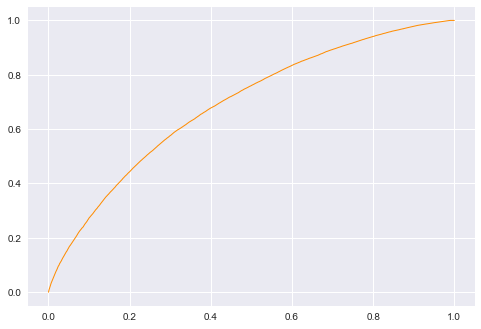

In [49]:
fpr_pbm, tpr_pbm, thresholds_pbm = roc_curve(
    y_true=pbm_eva_df.isClicked,
    y_score=pbm_eva_df.PCu)
plt.plot(fpr_pbm, tpr_pbm, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr_pbm, tpr_pbm))

plt.show()

# 4. COEC model

In [50]:
coec_eva_df = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentId']).join(coecdf3.Alpha)


In [51]:
coec_eva_df

,contentPosition,isClicked,Alpha
contentId,,,
014kG,1,1.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149


In [52]:
metrics.roc_auc_score(y_true=coec_eva_df.isClicked, y_score=coec_eva_df.Alpha)

0.67607309940301774

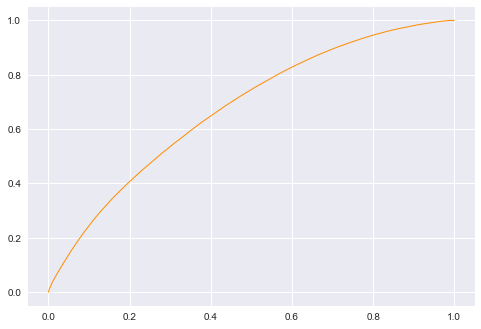

In [54]:
fpr_coec, tpr_coec, thresholds_coec = roc_curve(
    y_true=coec_eva_df.isClicked,
    y_score=coec_eva_df.Alpha)

plt.plot(fpr_coec, tpr_coec, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr_coec, tpr_coec))

plt.show()

## 5. Logistic Regression

In [98]:
fpr_LR, tpr_LR, thresholds = metrics.roc_curve(y_test, predicted_probas[:, 1])

print(metrics.auc(fpr_LR, tpr_LR))

0.694193180438


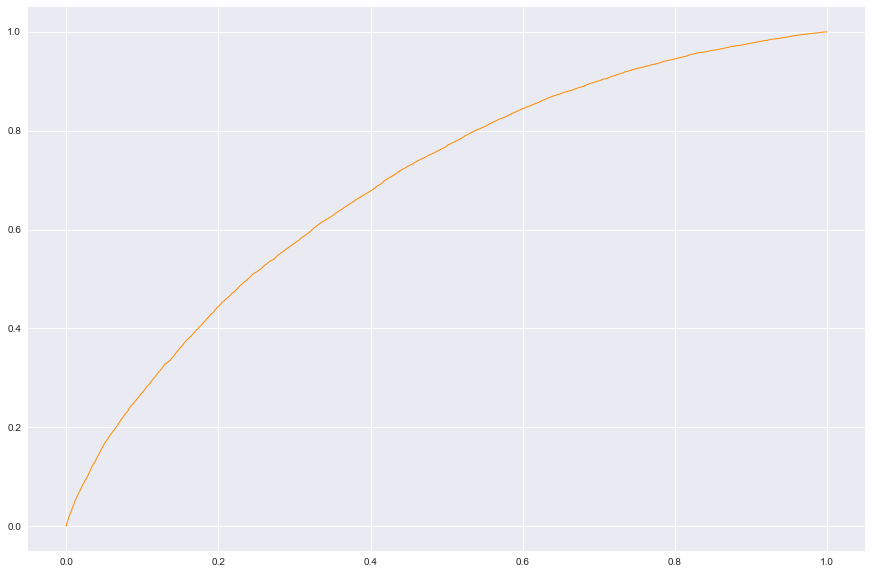

In [99]:
plt.plot(fpr_LR, tpr_LR, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr_LR, tpr_LR))

plt.show()



 # results

In [55]:
print ("Mean-Square-Error method :")
print("Random clicked models %s" % rcm_mse_result)
print("Rank based CTR model %s" % rctr_mse_result)
print("Position-based model %s" % pbm_mse_result)

Mean-Square-Error method :
Random clicked models 0.023917422776356438
Rank based CTR model 0.023789425275192785
Position-based model 0.023871586623877623


In [56]:
print ("Log Loss method :")
print("Random clicked models %s" % rcm_lls_result)
print("Rank based CTR model %s" % rctr_lls_result)
print("Position-based model %s" % pbm_lls_result)

Log Loss method :
Random clicked models 3.62199258892
Rank based CTR model 3.73077558153
Position-based model 5.31535746066


### AUC

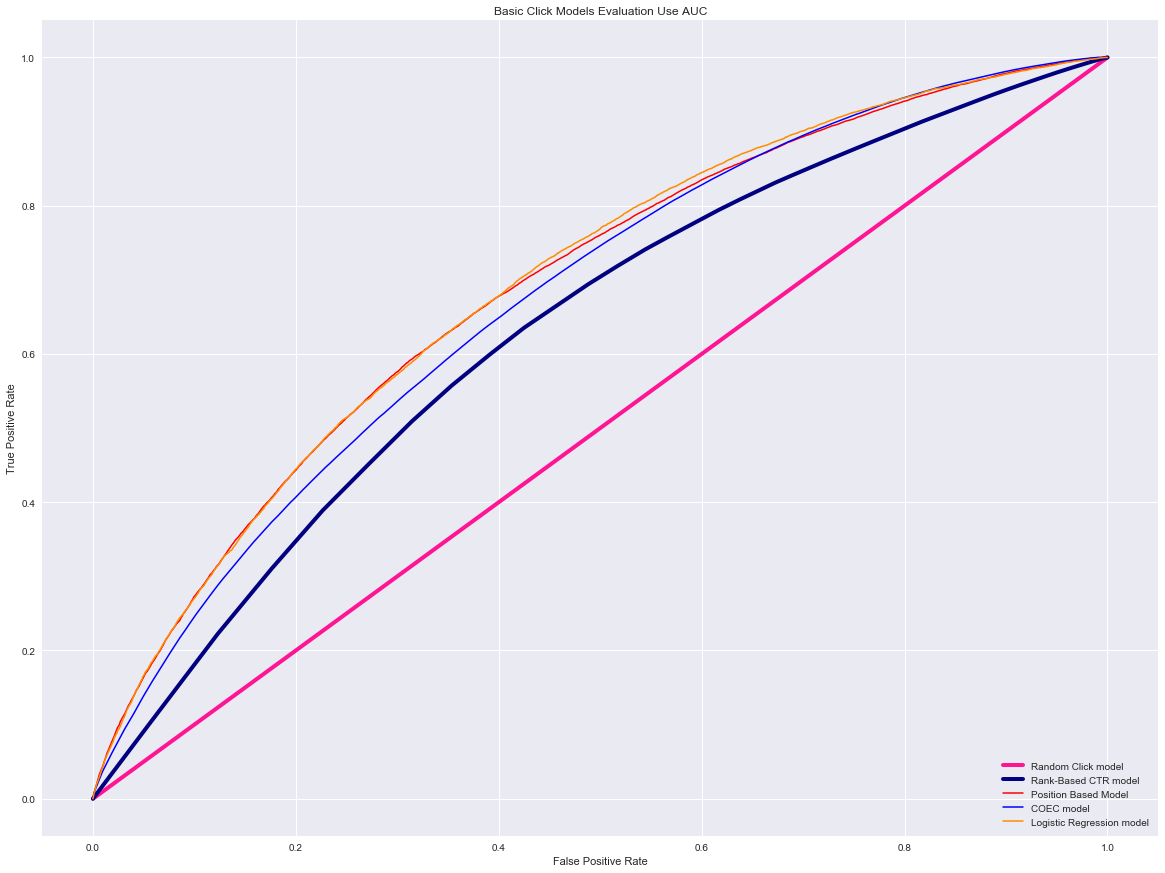

In [105]:
sns.set(rc={"figure.figsize": (20, 15)})
plt.figure()
plt.plot(fpr_rcm, tpr_rcm,
         label='Random Click model',
         color='deeppink', linewidth=4)

plt.plot(fpr_rctr, tpr_rctr,
         label='Rank-Based CTR model',
         color='navy', linewidth=4)

plt.plot(fpr_pbm, tpr_pbm,
         label='Position Based Model',
         color='red', linewidth=1.5)

plt.plot(fpr_coec, tpr_coec,
         label='COEC model',
         color='blue', linewidth=1.5)

plt.plot(fpr_LR, tpr_LR,
         label='Logistic Regression model',
         color='darkorange', linewidth=1.5)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic Click Models Evaluation Use AUC')
plt.legend(loc="lower right")
plt.show()